In [185]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt

In [186]:

wikibedia=requests.get("https://en.wikipedia.org/wiki/1985_World_Rally_Championship")# request to get the html page from the webstie
page=wikibedia.text
rem_nl = lambda s: s.replace("\n", "")# remove ('/n') from each cell have /n /n came with reading data from html
soup = BeautifulSoup(page, 'html.parser')# configure our page as html to read its tags by BeautifulSoup library to make it easier to read 
#data from html file
table_demographics = soup.find_all("table")[4] #findall tages table and select table number 5 which index 4
rows = [row for row in table_demographics.find_all("tr")]# get column names with by for loob on table_diagram
# which have tables and then select its (tr) table row 
header_row = rows[0]# get only firs row which have the column names
columns = [rem_nl(header_row.find_all("th")[col].get_text()) for col in range(0,len(header_row.find_all("th"))-1) if header_row.find_all("th")[col].get_text()]
#we -1 from columns becouse in our case i have devided my table in to 2 tables to make it easier in scraping
v=[]

#columns list of column names which have tage (th) table header v list to carry our data row note it must consists of 2D array 
#becouse pandas read 2D array by in 1D array the rows and 2D array cells of table
for row in range(1,len(rows)):
    he=[]
    if len(rows[row].find_all("td"))>0:# here we itrate on the html td tag to get our table records
        
        if len(rows[row].find_all("th"))>0:
            x=rem_nl(rows[row].find_all("th")[0].get_text())
            he.append(int(x))#convert data to int by int()
        for val in range(0,2):
            if len(rows[row].find_all("th"))>0:
                he.append(rem_nl(rows[row].find_all("td")[val].get_text()))
        
    if(len(he)>0):
        v.append(he)
columns[1]="Rally"#change column name to match the other table column names
wiki1= pd.DataFrame(data = v, columns = columns) # create our banda table



In [187]:
#edits on pandas table
wiki1['Round'] = wiki1['Round'].apply(lambda x : int(x))
wiki1['Stages'] = wiki1['Stages'].apply(lambda x : str(x))
wiki1['Rally'] = wiki1['Rally'].apply(lambda x : str(x))
wiki1.Round = wiki1.Round.apply(lambda x : int(x))# convert column with its values to int datatype

In [188]:
wiki1

,Round,Rally,Stages
0,1,Monte Carlo Rally(26 January–1 February),34 stages852 kmTarmac
1,2,Swedish Rally(15–17 February),29 stages505 kmSnow/Ice
2,3,Rally de Portugal(6–9 March),47 stages733 kmGravel/Tarmac
3,4,Safari Rally(4–8 April),88 controls5167.6 kmGravel
4,5,Tour de Corse(2–4 May),29 stages1078 kmTarmac
5,6,Acropolis Rally(27–30 May),47 stages807.8 kmGravel
6,7,Rally New Zealand(29 June–2 July),46 stages894 kmGravel
7,8,Rally Argentina(31 July–3 August),23 stages959 kmGravel
8,9,1000 Lakes Rally(23–25 August),50 stages479 kmGravel
9,10,Rallye Sanremo(29 September–4 October),45 stages650 kmGravel/Tarmac


In [189]:

rallyweb=requests.get("https://rallygroupbshrine.org/rally-results-videos/1985-wrc-schedule-results-videos/")
page_rally=rallyweb.text
rem_nl = lambda s: s.replace("\n", "")
soup_rally = BeautifulSoup(page_rally, 'html.parser')
table_demographics_rally = soup_rally.find_all("table")[0]
rows_rally = [row for row in table_demographics_rally.find_all("tr")]
header_row_rally = rows_rally[0]
rally_columns = [rem_nl(header_row_rally.find_all("th")[col].get_text()) for col in range(0,len(header_row_rally.find_all("th"))-1) if header_row_rally.find_all("th")[col].get_text()]
rally_data=[]

for row in range(1,len(rows_rally)):
    he=[]
    if len(rows_rally[row].find_all("td"))>0:
        
        if len(rows_rally[row].find_all("th"))>0:
            x=rem_nl(rows_rally[row].find_all("th")[0].get_text())
            he.append(int(x))
        for val in range(0,2):
            if len(rows_rally[row].find_all("th"))>0:
                he.append(rem_nl(rows_rally[row].find_all("td")[val].get_text()))
        
    if(len(he)>0):
        rally_data.append(he)
rally_columns[0]="Round"  # the old column name was # that it is not reasonable so i have change it to the same name of first table   
rally_table= pd.DataFrame(data = rally_data, columns = rally_columns)



In [190]:
#edits on pandas table
rally_table['Round'] = rally_table['Round'].apply(lambda x : int(x))
rally_table['Stages'] = rally_table['Stages'].apply(lambda x : str(x))
rally_table['Rally'] = rally_table['Rally'].apply(lambda x : str(x))

In [191]:
rally_table

,Round,Rally,Stages
0,1,53ème Rallye Auto de Monte Carlo (26 Jan – 1 Feb),34 stages852 kmTarmac
1,2,35th Int’l Swedish Rally (15-17 Feb),29 stages505 kmSnowIce
2,3,19º Rallye de Portugal Vinho do Porto (6-9 Mar),47 stages733 kmGravelTarmac
3,4,33rd Marlboro Safari Rally (4-8 Apr),88 controls5167.6 kmGravel
4,5,29ème Tour De Corse – Rallye de France (2-4 May),29 stages1078 kmTarmac
5,6,32nd Acropolis Rally (27-30 May),47 stages807.8 kmGravel
6,7,15th AWA Clarion Rally of New Zealand (29 Jun ...,46 stages894 kmGravel
7,8,5º Marlboro Rally Argentina (31 Jul – 3 Aug),23 stages959 kmGravel
8,9,35th 1000 Lakes Rally (23-25 Aug),50 stages479 kmGravel
9,10,27º Rallye Sanremo (29 Sep – 4 Oct),45 stages650 kmGravelTarmac


In [192]:
headerwiki2=rows[1]
data2=[row for row in table_demographics.find_all("tr")]
columnswiki2 = [rem_nl(headerwiki2.find_all("th")[col].get_text()) for col in range(0,len(headerwiki2.find_all("th"))) if headerwiki2.find_all("th")[col].get_text()]
rowswiki2=[]
for i  in range(2,len(data2)):
    le=0   
    hv=[]
    if len(data2[i].find_all("td"))>0:
        if len(data2[i].find_all("td"))>6:
            le=2
        for j in range(le,len(data2[i].find_all("td"))):
            if len(data2[i].find_all("td")[j].get_text())>1:
                hv.append(rem_nl(data2[i].find_all("td")[j].get_text()))
        
    if len(hv)>0:
        rowswiki2.append(hv)
        


wiki2= pd.DataFrame(data = rowswiki2, columns = columnswiki2)



In [193]:
#edits on pandas table
wiki2["Rank"] = wiki2["Rank"].apply(lambda x : int(x))
wiki2["Driver"] = wiki2["Driver"].apply(lambda x : str(x))
wiki2["Team"] = wiki2["Team"].apply(lambda x : str(x))
wiki2["Car"] = wiki2["Car"].apply(lambda x : str(x))
wiki2["Time"] = wiki2["Time"].apply(lambda x : str(x))

In [194]:
wiki2

,Rank,Driver,Co-driver,Team,Car,Time
0,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 T16,10:20:49
1,2,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport Quattro,10:26:06
2,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 T16,10:30:54
3,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 T16,4:38:49
4,2,Stig Blomqvist,Björn Cederberg,Audi Sport,Audi Sport Quattro,4:40:38
5,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 T16,4:42:15
6,1,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 T16,8:07.25
7,2,Miki Biasion,Tiziano Siviero,Jolly Club,Lancia 037 Rally evo,8:12:12
8,3,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport Quattro,8:13:23
9,1,Juha Kankkunen,Fred Gallagher,Toyota Team Europe,Toyota Celica TCT,+5:18 pen


In [195]:
headerrally2=rows_rally[1]
data2rally=[row for row in table_demographics_rally.find_all("tr")]
columnsrally2 = [rem_nl(headerrally2.find_all("th")[col].get_text()) for col in range(0,len(headerrally2.find_all("th"))) if headerrally2.find_all("th")[col].get_text()]
rowsrally22=[]
for i  in range(2,len(data2rally)):
    le=0   
    hv=[]
    if len(data2rally[i].find_all("td"))>0:
        if len(data2rally[i].find_all("td"))>6:
            le=2
        for j in range(le,len(data2rally[i].find_all("td"))):
            if len(data2rally[i].find_all("td")[j].get_text()):
                hv.append(rem_nl(data2rally[i].find_all("td")[j].get_text()))
        
    if len(hv)>0:
        rowsrally22.append(hv)
rally2= pd.DataFrame(data = rowsrally22, columns = columnsrally2)

In [196]:
#edits on pandas
rally2.insert(3, 'Team', wiki2.Team)# we add another column with is important to add from the first table
rally2.drop(['R'], inplace=True, axis=1)#we have drop R column 
rally2.insert(0, 'Rank', wiki2.Rank)#we add it again by another name
rally2["Rank"] = rally2["Rank"].apply(lambda x : int(x))
rally2["Driver"] = rally2["Driver"].apply(lambda x : str(x))
rally2["Co-driver"] = rally2["Co-driver"].apply(lambda x : str(x))
rally2["Team"] = rally2["Team"].apply(lambda x : str(x))
rally2["Car"] = rally2["Car"].apply(lambda x : str(x))

In [197]:
rally2

,Rank,Driver,Co-driver,Team,Car,Time
0,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 Turbo 16,10:20:49
1,2,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport quattro,10:26:06
2,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,10:30:54
3,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 Turbo 16,4:38:49
4,2,Stig Blomqvist,Björn Cederberg,Audi Sport,Audi Sport quattro,4:40:38
5,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,4:42:15
6,1,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,8:07.25
7,2,Miki Biasion,Tiziano Siviero,Jolly Club,Lancia 037,8:12:12
8,3,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport quattro,8:13:23
9,1,Juha Kankkunen,Fred Gallagher,Toyota Team Europe,Toyota Celica TCT,+5:18 pen


In [210]:
# finally we have to filter out data and check the dublication and make final pandas table
mydata=[]
for i in range( 0,len(wiki1)): 
    temp=[]
    for col in columns:
            if type(rally_table[col][i])==np.int64:# here we check the type of data in pandas no 
                # abslute int we have int32 and int64 and we can get this datatypes by numby library
                if rally_table[col][i] == wiki1[col][i]:
                    temp.append(rally_table[col][i])
            if type(wiki1[col][i]) is str:
                x=wiki1[col][i].replace('/',' ')# removing / from data which it located in data of table 1 and not located in table 2
                if rally_table[col][i]==wiki1[col][i]:
                     temp.append(wiki1[col][i])
                else: 
     
                    # first table writen in english and the second written by spanich so we can search by the comman words
                   # if thier this less than 1 comman word than thier is dublication
                    str1_words = set(rally_table[col][i][:rally_table[col][i].find('(')].split())
                    str2_words = set(wiki1[col][i][:wiki1[col][i].find('(')].split())
                    common = str1_words & str2_words
                    if len(common)>1:
                 
                        temp.append(wiki1[col][i])
                               
    if len(temp)>0:
        mydata.append(temp)
final= pd.DataFrame(data =mydata, columns = columns)

In [211]:
final['Rally'] = final['Rally'].apply(lambda x : str(x)[:x.find('(')])

In [212]:
final

,Round,Rally,Stages
0,1,Monte Carlo Rally,34 stages852 kmTarmac
1,2,Swedish Rally,29 stages505 kmSnow/Ice
2,3,Rally de Portugal,47 stages733 kmGravel/Tarmac
3,4,Safari Rally,88 controls5167.6 kmGravel
4,5,Tour de Corse,29 stages1078 kmTarmac
5,6,Acropolis Rally,47 stages807.8 kmGravel
6,7,Rally New Zealand,46 stages894 kmGravel
7,8,Rally Argentina,23 stages959 kmGravel
8,9,1000 Lakes Rally,50 stages479 kmGravel
9,10,Rallye Sanremo,45 stages650 kmGravel/Tarmac


In [213]:
mydata=[]
import numpy as np
for i in range( 0,len(wiki2)): 
    temp=[]
    for col in columnswiki2:
            if type(rally2[col][i])==np.int64:
                if rally2[col][i] == wiki2[col][i]:
                    temp.append(rally2[col][i])
            if type(wiki2[col][i]) is str:
                sp1=rally2[col][i].split(" ")
                sp2=wiki2[col][i].split(" ")
                if sp2[0]+sp2[0] == sp2[0]+sp2[0] :
                    temp.append(rally2[col][i])
                # we have time in our tavle so we will devid it to h,m,s ,pen by checking 
                #if splite by : have length 2 then it is only min and hours and pen true
                #if splite by : have length 3 then it is only min and hours and second and pen false
                if len(rally2[col][i].split(":"))==2:
                    f=rally2[col][i].split(":")
                    temp.append(None)
                    temp.append(int(f[0].replace("+", "")))
                    x=f[1].replace(" pen", "")
                    temp.append(float(x.replace(" ",'')))
                    temp.append(True)
                if len(rally2[col][i].split(":"))==3:
                    f=rally2[col][i].split(":")
                    temp.append(int(f[0]))
                    temp.append(int(f[1]))
                    temp.append(int(f[2]))
                    temp.append(False)
    if len(temp)>0:    
        mydata.append(temp)
final2= pd.DataFrame(data =mydata, columns = columnswiki2+["Hours","Minties","Seconds",'Pen'])

In [214]:
final2["Rank"] = final2["Rank"].apply(lambda x : int(x))
final2["Driver"] = final2["Driver"].apply(lambda x : str(x))
final2["Co-driver"] = final2["Co-driver"].apply(lambda x : str(x))
final2["Team"] = final2["Team"].apply(lambda x : str(x))
final2["Car"] = final2["Car"].apply(lambda x : str(x))

In [215]:
final2

,Rank,Driver,Co-driver,Team,Car,Time,Hours,Minties,Seconds,Pen
0,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 Turbo 16,10:20:49,10.0,20,49.00,False
1,2,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport quattro,10:26:06,10.0,26,6.00,False
2,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,10:30:54,10.0,30,54.00,False
3,1,Ari Vatanen,Terry Harryman,Peugeot Talbot Sport,Peugeot 205 Turbo 16,4:38:49,4.0,38,49.00,False
4,2,Stig Blomqvist,Björn Cederberg,Audi Sport,Audi Sport quattro,4:40:38,4.0,40,38.00,False
5,3,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,4:42:15,4.0,42,15.00,False
6,1,Timo Salonen,Seppo Harjanne,Peugeot Talbot Sport,Peugeot 205 Turbo 16,8:07.25,NaN,8,7.25,True
7,2,Miki Biasion,Tiziano Siviero,Jolly Club,Lancia 037,8:12:12,8.0,12,12.00,False
8,3,Walter Röhrl,Christian Geistdörfer,Audi Sport,Audi Sport quattro,8:13:23,8.0,13,23.00,False
9,1,Juha Kankkunen,Fred Gallagher,Toyota Team Europe,Toyota Celica TCT,+5:18 pen,NaN,5,18.00,True


In [216]:
#we here compine the to table resualt i have compine it by array of last 5 rows
#that in the last 5 rows have 3 time rows more than the first 3
comdata=[]
l=0
for z in range(0,12):
    
    for i  in range(0,6):
        he=[]
        for j in range(l,l+3):
            he.append(mydata[j][i])
        comdata.append(he)
    l+=3
alldata=[]
lent=0
for i in range(0,12):
    temp=rally_data[i]
 
    temp=rally_data[i]+[comdata[lent]]+[comdata[lent+1]]+[comdata[lent+2]]+[comdata[lent+3]]+[comdata[lent+4]]+[comdata[lent+5]]
    lent+=6
    alldata.append(temp)
final3= pd.DataFrame(data =alldata, columns =  columns+columnswiki2)


In [217]:
final3["Driver"] = final3["Driver"].apply(lambda x : list(x))
final3["Co-driver"] = final3["Co-driver"].apply(lambda x : list(x))
final3["Team"] = final3["Team"].apply(lambda x : list(x))
final3["Car"] = final3["Car"].apply(lambda x : list(x))
final3['Rally'] = final3['Rally'].apply(lambda x : str(x)[:x.find('(')])

In [218]:
final3

,Round,Rally,Stages,Rank,Driver,Co-driver,Team,Car,Time
0,1,53ème Rallye Auto de Monte Carlo,34 stages852 kmTarmac,"[1, 2, 3]","[ Ari Vatanen, Walter Röhrl, Timo Salonen]","[ Terry Harryman, Christian Geistdörfer, Sepp...","[ Peugeot Talbot Sport, Audi Sport, Peugeot ...","[Peugeot 205 Turbo 16, Audi Sport quattro, Peu...","[10:20:49, 10:26:06, 10:30:54]"
1,2,35th Int’l Swedish Rally,29 stages505 kmSnowIce,"[1, 2, 3]","[ Ari Vatanen, Stig Blomqvist, Timo Salonen]","[ Terry Harryman, Björn Cederberg, Seppo Har...","[ Peugeot Talbot Sport, Audi Sport, Peugeot ...","[Peugeot 205 Turbo 16, Audi Sport quattro, Peu...","[4:38:49, 4:40:38, 4:42:15]"
2,3,19º Rallye de Portugal Vinho do Porto,47 stages733 kmGravelTarmac,"[1, 2, 3]","[ Timo Salonen, Miki Biasion, Walter Röhrl]","[ Seppo Harjanne, Tiziano Siviero, Christian ...","[ Peugeot Talbot Sport, Jolly Club, Audi Sport]","[Peugeot 205 Turbo 16, Lancia 037, Audi Sport ...","[8:07.25, 8:12:12, 8:13:23]"
3,4,33rd Marlboro Safari Rally,88 controls5167.6 kmGravel,"[1, 2, 3]","[ Juha Kankkunen, Björn Waldegård, Mike Kirk...","[ Fred Gallagher, Hans Thorszelius, Anton Le...","[ Toyota Team Europe, Toyota Team Europe, Te...","[Toyota Celica TCT, Toyota Celica TCT, Nissan ...","[+5:18 pen, +5:52 pen, +6:01 pen]"
4,5,29ème Tour De Corse – Rallye de France,29 stages1078 kmTarmac,"[1, 2, 3]","[ Jean Ragnotti, Bruno Saby, Bernard Béguin]","[ Pierre Thimonier, Jean-François Fauchille, ...","[ Renault Elf Philips, Peugeot Talbot Sport, ...","[Renault R5 Maxi Turbo, Peugeot 205 Turbo16 E2...","[12:54:15, 13:06:47, 13:20:04]"
5,6,32nd Acropolis Rally,47 stages807.8 kmGravel,"[1, 2, 3]","[ Timo Salonen, Stig Blomqvist, Ingvar Carls...","[ Seppo Harjanne, Björn Cederberg, Benny Mel...","[ Peugeot Talbot Sport, Audi Sport, Mazda Ra...","[Peugeot 205 Turbo 16 E2, Audi Sport quattro, ...","[10:20:19, 10:24:34, 11:08:25]"
6,7,15th AWA Clarion Rally of New Zealand,46 stages894 kmGravel,"[1, 2, 3]","[ Timo Salonen, Ari Vatanen, Walter Röhrl]","[ Seppo Harjanne, Terry Harryman, Christian G...","[ Peugeot Talbot Sport, Peugeot Talbot Sport,...","[Peugeot 205 Turbo 16 E2, Peugeot 205 Turbo 16...","[8:29:16, 8:30:33, 8:31:42]"
7,8,5º Marlboro Rally Argentina,23 stages959 kmGravel,"[1, 2, 3]","[ Timo Salonen, Wilfred Wiedner, Carlos Reut...","[ Seppo Harjanne, Franz Zehetner, Jean-Franç...","[ Peugeot Talbot Sport, Audi Sport, Peugeot ...","[Peugeot 205 Turbo 16 E2, Audi quattro A2, Peu...","[10:04:33, 10:18:29, 10:35:47]"
8,9,35th 1000 Lakes Rally,50 stages479 kmGravel,"[1, 2, 3]","[ Timo Salonen, Stig Blomqvist, Markku Alén]","[ Seppo Harjanne, Björn Cederberg, Ilkka Kiv...","[ Peugeot Talbot Sport, Audi Sport, Martini ...","[Peugeot 205 Turbo 16 E2, Audi Sport quattro S...","[4:10:35, 4:11:23, 4:14:14]"
9,10,27º Rallye Sanremo,45 stages650 kmGravelTarmac,"[1, 2, 3]","[ Walter Röhrl, Timo Salonen, Henri Toivonen]","[Christian Geistdörfer, Seppo Harjanne, Juha...","[ Audi Sport, Peugeot Talbot Sport, Martini ...","[Audi Sport quattro S1, Peugeot 205 Turbo 16 E...","[7:10:10, 7:16:39, 7:18:02]"


<AxesSubplot:>

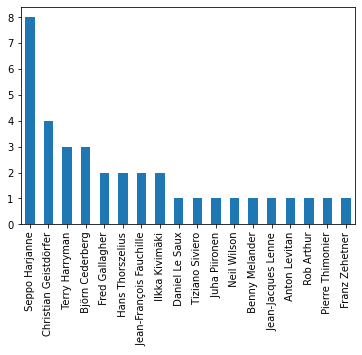

In [219]:
final2['Co-driver'].value_counts().plot.bar()# most participate co drivers in races

<AxesSubplot:>

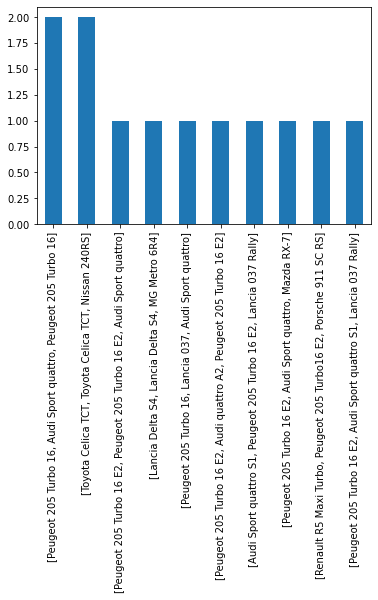

In [220]:
final3['Car'].value_counts().plot.bar()

<AxesSubplot:>

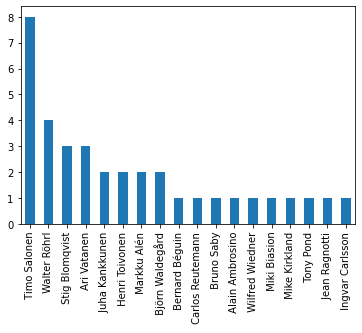

In [221]:
final2['Driver'].value_counts().plot.bar()# chart for number of counting number of drivers in rows

<AxesSubplot:xlabel='Rank', ylabel='Driver'>

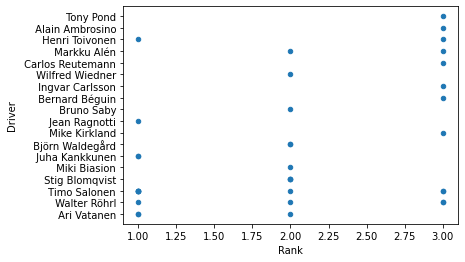

In [161]:
final2.plot(x ='Rank', y='Driver', kind = 'scatter')

<AxesSubplot:>

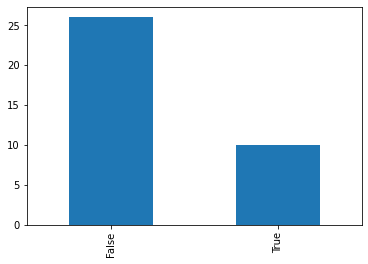

In [162]:
final2['Pen'].value_counts().plot.bar()# chart for pen matches to not pen matches

In [163]:
print(final.dtypes)
print("------------")
print(final2.dtypes)
print("------------")
print(final3.dtypes)

Round      int64
Rally     object
Stages    object
dtype: object
------------
Rank           int64
Driver        object
Co-driver     object
Team          object
Car           object
Time          object
Hours        float64
Minties        int64
Seconds      float64
Pen             bool
dtype: object
------------
Round         int64
Rally        object
Stages       object
Rank         object
Driver       object
Co-driver    object
Team         object
Car          object
Time         object
dtype: object
